[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

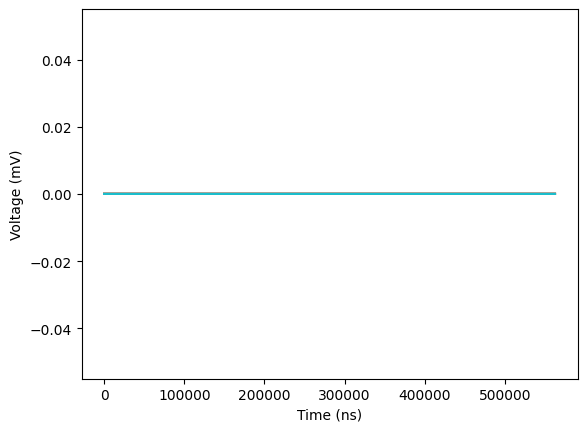

{'openunit': 0, 'setChA': 0, 'setChB': 0, 'trigger': 0, 'getTimebase2': 0, 'setMemorySegments': 0, 'SetNoOfCaptures': 0, 'setDataBufferA0': 0, 'setDataBufferA1': 0, 'setDataBufferA2': 0, 'setDataBufferA3': 0, 'setDataBufferA4': 0, 'setDataBufferA5': 0, 'setDataBufferA6': 0, 'setDataBufferA7': 0, 'setDataBufferA8': 0, 'setDataBufferA9': 0, 'setDataBufferB0': 0, 'setDataBufferB1': 0, 'setDataBufferB2': 0, 'setDataBufferB3': 0, 'setDataBufferB4': 0, 'setDataBufferB5': 0, 'setDataBufferB6': 0, 'setDataBufferB7': 0, 'setDataBufferB8': 0, 'setDataBufferB9': 0, 'runBlock': 0, 'isReady': 0, 'getValuesBulk': 0, 'stop': 0, 'close': 0}


In [4]:
#
# Copyright (C) 2018 Pico Technology Ltd. See LICENSE file for terms.
#
# PS4000A RAPID BLOCK MODE EXAMPLE
# This example opens a 4000a driver device, sets up two channels and a trigger then collects 10 blocks of data with additional driver calls.
# This data is then plotted as mV against time in ns.

import ctypes
import numpy as np
from picosdk.ps4000a import ps4000a as ps
import matplotlib.pyplot as plt
from picosdk.functions import adc2mV, assert_pico_ok

# Create chandle and status ready for use
chandle = ctypes.c_int16()
status = {}

# Open 4000 series PicoScope
# Returns handle to chandle for use in future API functions
status["openunit"] = ps.ps4000aOpenUnit(ctypes.byref(chandle), None)

try:
    assert_pico_ok(status["openunit"])
except: # PicoNotOkError:
    powerStatus = status["openunit"]

    if powerStatus == 286:
        status["changePowerSource"] = ps.ps4000aChangePowerSource(chandle, powerStatus)
    elif powerStatus == 282:
        status["changePowerSource"] = ps.ps4000aChangePowerSource(chandle, powerStatus)
    else:
        raise

    assert_pico_ok(status["changePowerSource"])

# Set up channel A
# handle = chandle
# channel = PS4000a_CHANNEL_A = 0
# enabled = 1
# coupling type = PS4000a_DC = 1
# range = PS4000a_2V = 7
# analogOffset = 0 V
chARange = 7
status["setChA"] = ps.ps4000aSetChannel(chandle, 0, 1, 1, chARange, 0)
assert_pico_ok(status["setChA"])

# Set up channel B
# handle = chandle
# channel = PS4000a_CHANNEL_B = 1
# enabled = 1
# coupling type = PS4000a_DC = 1
# range = PS4000a_2V = 7
# analogOffset = 0 V
chBRange = 7
status["setChB"] = ps.ps4000aSetChannel(chandle, 1, 1, 1, chBRange, 0)
assert_pico_ok(status["setChB"])

# Set up single trigger
# handle = chandle
# enabled = 1
# source = PS4000a_CHANNEL_A = 0
# threshold = 1024 ADC counts
# direction = PS4000a_RISING = 2
# delay = 0 s
# auto Trigger = 1000 ms
status["trigger"] = ps.ps4000aSetSimpleTrigger(chandle, 0, 0, 4000, 2, 0, 1000)
assert_pico_ok(status["trigger"])

# Set number of pre and post trigger samples to be collected
preTriggerSamples = 2500
postTriggerSamples = 2500
maxSamples = preTriggerSamples + postTriggerSamples

# Get timebase information
# WARNING: When using this example it may not be possible to access all Timebases as all channels are enabled by default when opening the scope.  
# To access these Timebases, set any unused analogue channels to off.
# handle = chandle
# timebase = 8 = timebase
# noSamples = maxSamples
# pointer to timeIntervalNanoseconds = ctypes.byref(timeIntervalns)
# pointer to maxSamples = ctypes.byref(returnedMaxSamples)
# segment index = 0
timebase = 8
timeIntervalns = ctypes.c_float()
returnedMaxSamples = ctypes.c_int32()
oversample = ctypes.c_int16(1)
status["getTimebase2"] = ps.ps4000aGetTimebase2(chandle, timebase, maxSamples, ctypes.byref(timeIntervalns), ctypes.byref(returnedMaxSamples), 0)
assert_pico_ok(status["getTimebase2"])

# Set memory segments
# handle = chandle
# nSegments = 10
nMaxSamples = ctypes.c_int32(0)
status["setMemorySegments"] = ps.ps4000aMemorySegments(chandle, 10, ctypes.byref(nMaxSamples))
assert_pico_ok(status["setMemorySegments"])

# Set number of captures
# handle = chandle
# nCaptures = 10
status["SetNoOfCaptures"] = ps.ps4000aSetNoOfCaptures(chandle, 10)
assert_pico_ok(status["SetNoOfCaptures"])

# set up buffers
bufferA0 = (ctypes.c_int16 * maxSamples)()
bufferA1 = (ctypes.c_int16 * maxSamples)()
bufferA2 = (ctypes.c_int16 * maxSamples)()
bufferA3 = (ctypes.c_int16 * maxSamples)()
bufferA4 = (ctypes.c_int16 * maxSamples)()
bufferA5 = (ctypes.c_int16 * maxSamples)()
bufferA6 = (ctypes.c_int16 * maxSamples)()
bufferA7 = (ctypes.c_int16 * maxSamples)()
bufferA8 = (ctypes.c_int16 * maxSamples)()
bufferA9 = (ctypes.c_int16 * maxSamples)()

bufferB0 = (ctypes.c_int16 * maxSamples)()
bufferB1 = (ctypes.c_int16 * maxSamples)()
bufferB2 = (ctypes.c_int16 * maxSamples)()
bufferB3 = (ctypes.c_int16 * maxSamples)()
bufferB4 = (ctypes.c_int16 * maxSamples)()
bufferB5 = (ctypes.c_int16 * maxSamples)()
bufferB6 = (ctypes.c_int16 * maxSamples)()
bufferB7 = (ctypes.c_int16 * maxSamples)()
bufferB8 = (ctypes.c_int16 * maxSamples)()
bufferB9 = (ctypes.c_int16 * maxSamples)()

# set data buffers
# handle = chandle
# channel = PS4000A_CHANNEL_A = 0
# buffer = bufferAX (where X = segmentIndex)
# bufferLength = maxSamples
# segmentIndex = X
# mode = PS4000A_RATIO_MODE_NONE = 0

status["setDataBufferA0"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferA0), maxSamples, 0, 0)
status["setDataBufferA1"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferA1), maxSamples, 1, 0)
status["setDataBufferA2"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferA2), maxSamples, 2, 0)
status["setDataBufferA3"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferA3), maxSamples, 3, 0)
status["setDataBufferA4"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferA4), maxSamples, 4, 0)
status["setDataBufferA5"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferA5), maxSamples, 5, 0)
status["setDataBufferA6"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferA6), maxSamples, 6, 0)
status["setDataBufferA7"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferA7), maxSamples, 7, 0)
status["setDataBufferA8"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferA8), maxSamples, 8, 0)
status["setDataBufferA9"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferA9), maxSamples, 9, 0)

status["setDataBufferB0"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferB0), maxSamples, 0, 0)
status["setDataBufferB1"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferB1), maxSamples, 1, 0)
status["setDataBufferB2"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferB2), maxSamples, 2, 0)
status["setDataBufferB3"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferB3), maxSamples, 3, 0)
status["setDataBufferB4"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferB4), maxSamples, 4, 0)
status["setDataBufferB5"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferB5), maxSamples, 5, 0)
status["setDataBufferB6"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferB6), maxSamples, 6, 0)
status["setDataBufferB7"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferB7), maxSamples, 7, 0)
status["setDataBufferB8"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferB8), maxSamples, 8, 0)
status["setDataBufferB9"] = ps.ps4000aSetDataBuffer(chandle, 0, ctypes.byref(bufferB9), maxSamples, 9, 0)

# run block capture
# handle = chandle
# number of pre-trigger samples = preTriggerSamples
# number of post-trigger samples = PostTriggerSamples
# timebase = 3 = 80 ns = timebase (see Programmer's guide for mre information on timebases)
# time indisposed ms = None (not needed in the example)
# segment index = 0
# lpReady = None (using ps4000aIsReady rather than ps4000aBlockReady)
# pParameter = None
status["runBlock"] = ps.ps4000aRunBlock(chandle, preTriggerSamples, postTriggerSamples, timebase, None, 0, None, None)
assert_pico_ok(status["runBlock"])

# check for end of capture
ready = ctypes.c_int16(0)
check = ctypes.c_int16(0)
while ready.value == check.value:
    status["isReady"] = ps.ps4000aIsReady(chandle, ctypes.byref(ready))

# Creates a overlow location for data
overflow = (ctypes.c_int16 * 10)()
# Creates converted types maxsamples
cmaxSamples = ctypes.c_int32(maxSamples)

# collect data 
# handle = chandle
# noOfSamples = cmaxSamples
# fromSegmentIndex = 0
# toSegmentIndex = 9
# downSampleRatio = 1
# downSampleRatioMode = PS4000A_RATIO_MODE_NONE
status["getValuesBulk"] = ps.ps4000aGetValuesBulk(chandle, ctypes.byref(cmaxSamples), 0, 9, 1, 0, ctypes.byref(overflow))
assert_pico_ok(status["getValuesBulk"])

# find maximum ADC count value
# handle = chandle
# pointer to value = ctypes.byref(maxADC)
maxADC = ctypes.c_int16(32767)

# convert from adc to mV
adc2mVChA0 =  adc2mV(bufferA0, chARange, maxADC)
print(adc2mVChA0)
adc2mVChA1 =  adc2mV(bufferA1, chARange, maxADC)
adc2mVChA2 =  adc2mV(bufferA2, chARange, maxADC)
adc2mVChA3 =  adc2mV(bufferA3, chARange, maxADC)
adc2mVChA4 =  adc2mV(bufferA4, chARange, maxADC)
adc2mVChA5 =  adc2mV(bufferA5, chARange, maxADC)
adc2mVChA6 =  adc2mV(bufferA6, chARange, maxADC)
adc2mVChA7 =  adc2mV(bufferA7, chARange, maxADC)
adc2mVChA8 =  adc2mV(bufferA8, chARange, maxADC)
adc2mVChA9 =  adc2mV(bufferA9, chARange, maxADC)

adc2mVChB0 =  adc2mV(bufferB0, chARange, maxADC)
adc2mVChB1 =  adc2mV(bufferB1, chARange, maxADC)
adc2mVChB2 =  adc2mV(bufferB2, chARange, maxADC)
adc2mVChB3 =  adc2mV(bufferB3, chARange, maxADC)
adc2mVChB4 =  adc2mV(bufferB4, chARange, maxADC)
adc2mVChB5 =  adc2mV(bufferB5, chARange, maxADC)
adc2mVChB6 =  adc2mV(bufferB6, chARange, maxADC)
adc2mVChB7 =  adc2mV(bufferB7, chARange, maxADC)
adc2mVChB8 =  adc2mV(bufferB8, chARange, maxADC)
adc2mVChB9 =  adc2mV(bufferB9, chARange, maxADC)

# Create time data
time = np.linspace(0, ((cmaxSamples.value)-1) * timeIntervalns.value, cmaxSamples.value)

# plot data
plt.plot(time, adc2mVChA0)
plt.plot(time, adc2mVChA1)
plt.plot(time, adc2mVChA2)
plt.plot(time, adc2mVChA3)
plt.plot(time, adc2mVChA4)
plt.plot(time, adc2mVChA5)
plt.plot(time, adc2mVChA6)
plt.plot(time, adc2mVChA7)
plt.plot(time, adc2mVChA8)
plt.plot(time, adc2mVChA9)
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (mV)')
plt.show()

# Stop the scope
# handle = chandle
status["stop"] = ps.ps4000aStop(chandle)
assert_pico_ok(status["stop"])

# Close unitDisconnect the scope
# handle = chandle
status["close"] = ps.ps4000aCloseUnit(chandle)
assert_pico_ok(status["close"])

# display status returns
print(status)
